In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.rcParams['figure.autolayout'] = True
sns.set()

In [2]:
df = pd.read_csv ('collectedMetrics.csv')

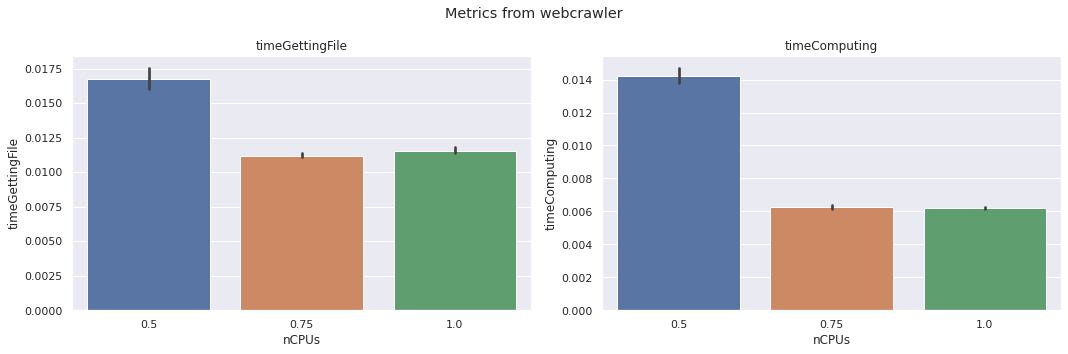

In [3]:
interestedCollumns = ["timeGettingFile", "timeComputing"]
fig, axes = plt.subplots(1, len(interestedCollumns), figsize=(15,5))
fig.suptitle('Metrics from webcrawler')

for i, collumnTitle in enumerate(interestedCollumns):
    sns.barplot(ax=axes[i], x="nCPUs", y=collumnTitle, data=df)
    axes[i].set_title(collumnTitle)

Text(0, 0.5, 'Time Getting File %')

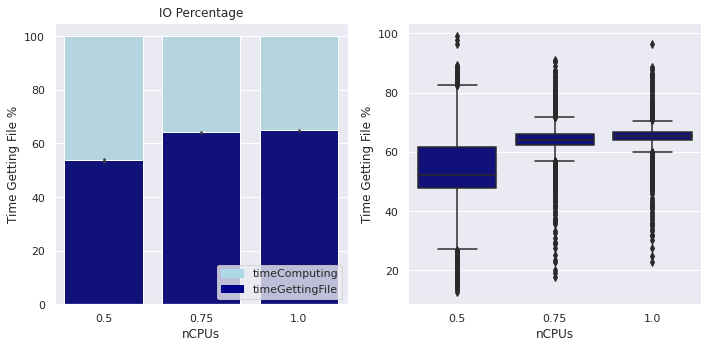

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# from raw value to percentage
percentDF = pd.DataFrame()
percentDF = df[['nCPUs', 'timeGettingFile', 'timeComputing']].copy()
percentDF["totalTime"] = df["timeGettingFile"] + df["timeComputing"]
percentDF["timeGettingFilePercent"] = df["timeGettingFile"] / percentDF["totalTime"] * 100
percentDF["total"] = 100

ax=axes[0]
bar1 = sns.barplot(x="nCPUs", y="total", data=percentDF, color='darkblue', ax=ax)
bar2 = sns.barplot(x="nCPUs", y="timeGettingFilePercent", data=percentDF, color='lightblue', ax=ax)

ax.set_title('IO Percentage')
ax.set_ylabel('Time Getting File %')
# add legend
top_bar = mpatches.Patch(color='darkblue', label='timeComputing')
bottom_bar = mpatches.Patch(color='lightblue', label='timeGettingFile')
ax.legend(handles=[top_bar, bottom_bar], loc="lower right")

ax=axes[1]
sns.boxplot(ax=ax, x="nCPUs", y="timeGettingFilePercent", color='lightblue', data=percentDF)
ax.set_ylabel('Time Getting File %')

In [5]:
percentDF.groupby(["nCPUs"]).mean()

,timeGettingFile,timeComputing,totalTime,timeGettingFilePercent,total
nCPUs,,,,,
0.50,0.016723,0.014243,0.030965,53.697965,100.0
0.75,0.011209,0.006262,0.017471,64.124647,100.0
1.00,0.011540,0.006203,0.017743,64.935232,100.0


In [6]:
totalExDF = pd.read_csv ('execTime.csv')

<AxesSubplot:xlabel='nCPUs', ylabel='Execution Time'>

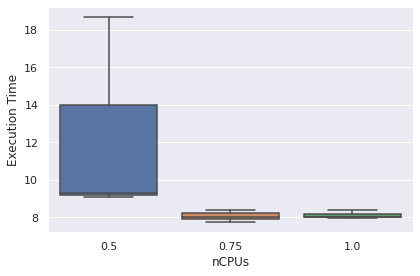

In [8]:
sns.boxplot(x="nCPUs", y="Execution Time", data=totalExDF)


<AxesSubplot:xlabel='nCPUs', ylabel='Execution Time'>

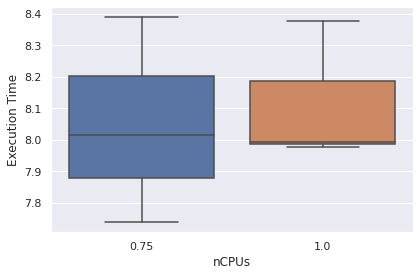

In [15]:
totalExDFFiltered = totalExDF.loc[totalExDF['nCPUs'] != 0.5]
sns.boxplot(x="nCPUs", y="Execution Time", data=totalExDFFiltered)